In [1]:
from csbdeep.utils import normalize
from skimage import io
from scipy.ndimage import rotate
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
from matplotlib.lines import Line2D

from glob import glob



In [12]:
imgs =['/Users/reyesmatte/Desktop/Imaging_paper/Fig3/Images_deconvolution/BsubtilismVenus_026_FM_subset.tif',
       '/Users/reyesmatte/Desktop/Imaging_paper/Fig3/Images_deconvolution/BsubtilismVenus_026_target_subset.tif',
       '/Users/reyesmatte/Desktop/Imaging_paper/Fig3/Images_deconvolution/BsubtilismVenus_026_FM2FM_subset.tif',
       '/Users/reyesmatte/Desktop/Imaging_paper/Fig3/Images_deconvolution/BsubtilismVenus_026_FP2FM_subset.tif']


imgs = [normalize(io.imread(img)) for img in imgs]
rotated_imgs = [rotate(img,-90) for img in imgs]

In [13]:
block1 = [img[y1:y1+256,x1:x1+256] for img in rotated_imgs]
block2 = [img[y2:y2+256,x2:x2+256] for img in rotated_imgs]

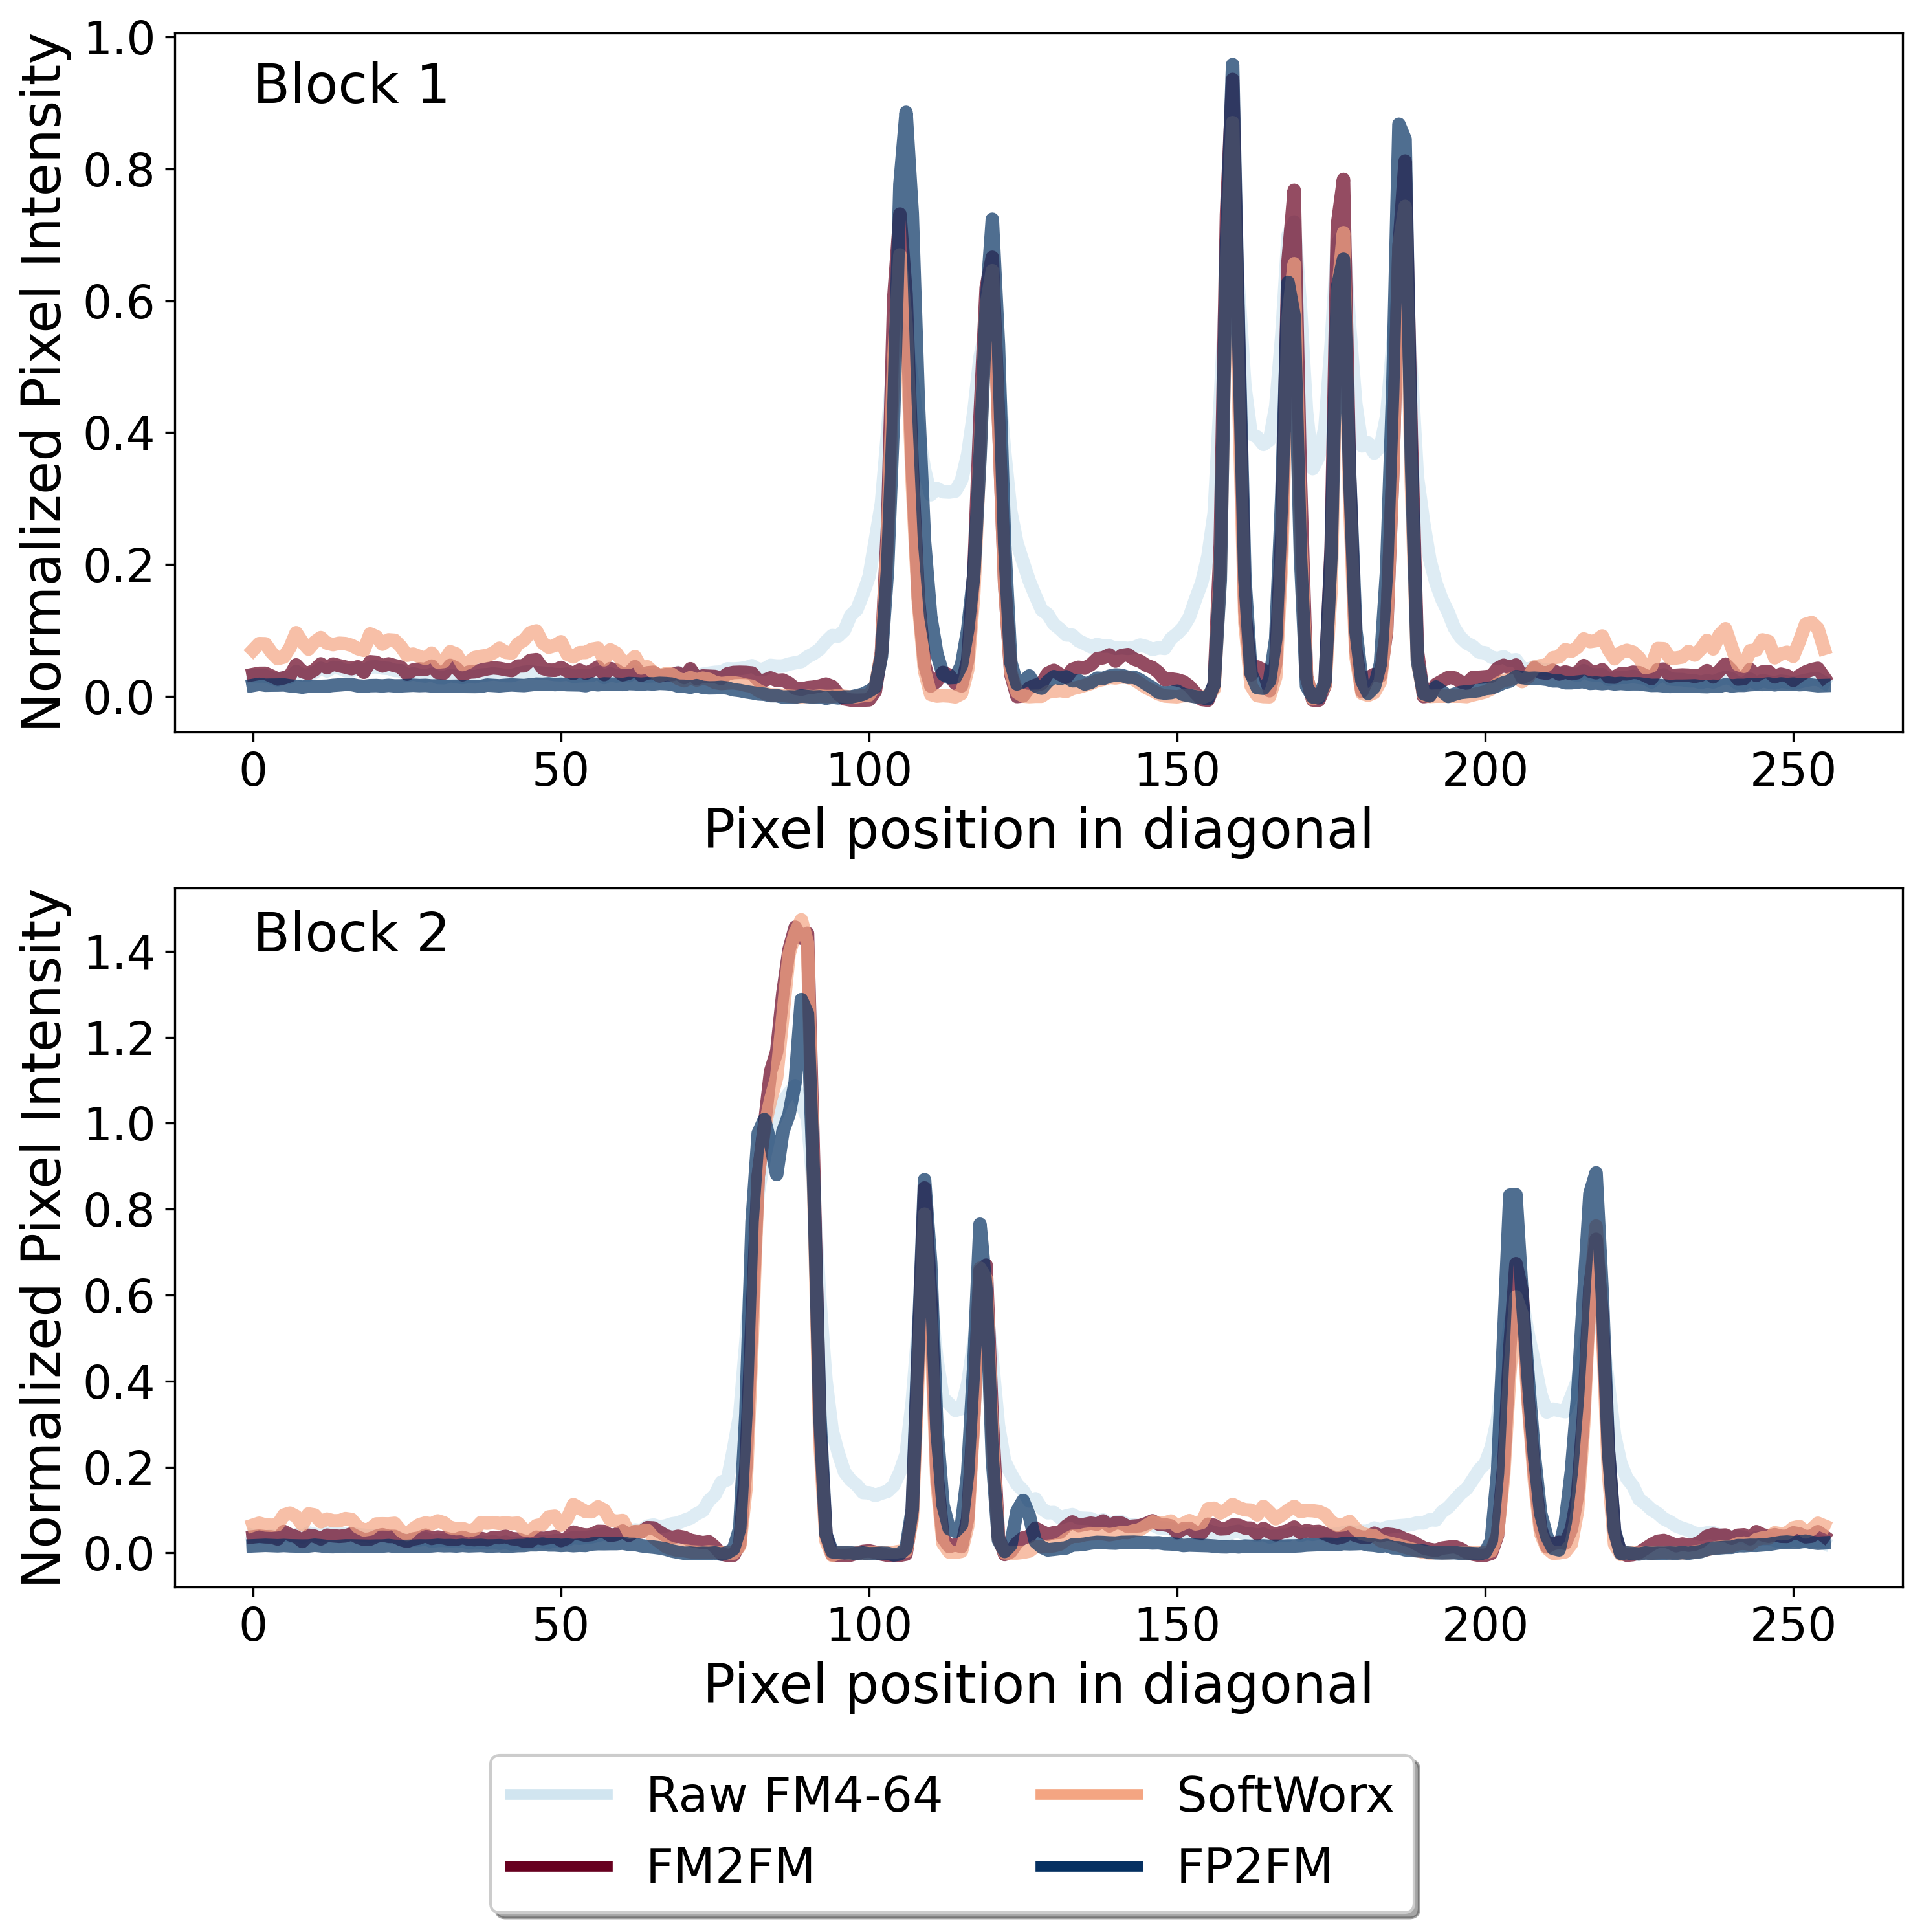

In [14]:
colors = ['#d1e5f0','#67001f','#f4a582','#053061']
custom_lines = [Line2D([0], [0], color=c, lw=4) for c in colors]
titles = ['Raw FM4-64','FM2FM','SoftWorx','FP2FM']

plt.figure(figsize=(10,10),dpi=300)

for i in range(len(colors)):

    plt.subplot(2,1,1)
    plt.plot(block1[i].diagonal(),c=colors[i],linewidth=5,alpha=0.7)
    plt.ylabel('Normalized Pixel Intensity',fontsize=20)
    plt.xlabel('Pixel position in diagonal',fontsize=20)
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)
   
    plt.subplot(2,1,2)
    plt.plot(block2[i].diagonal(),c=colors[i],linewidth=5,alpha=0.7)
    plt.ylabel('Normalized Pixel Intensity',fontsize=20)
    plt.xlabel('Pixel position in diagonal',fontsize=20)
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)

plt.subplot(2,1,1)
plt.text(0,0.9,'Block 1',size=20)


plt.subplot(2,1,2)
plt.text(0,1.4,'Block 2',size=20)
plt.legend(handles=custom_lines,labels=titles,loc='lower center', bbox_to_anchor=(0.45, -.5),
          fancybox=True, shadow=True, ncol=2,fontsize=18)

plt.tight_layout()

#plt.savefig('/Users/reyesmatte/Desktop/Imaging_paper/Fig3/diagonal_intensity_4conds.png')